# 1. Aim and Background


---



The aim of this project is to build a Natural Langauge Processing (NLP) model using a variety of neural netwoks
including recurrent neural netwroks (RNNs) for sentiment analysis on a customer reviews dataset. The input will be the review text of the dataset, while the output of the model will be the predicted customer star rating (Rating scale 1-5).


Sentiment analysis, a branch of natural language processing (NLP), involves examining digital texts to uncover their underlying emotional tone (Robinson, 2021). Leading companies like Amazon, Alphabet, and Microsoft allocate significant resources to sentiment analysis because of its substantial advantages in enhancing their offerings. This valuable technique contributes to various aspects, including market research, product assessment, social media marketing, brand monitoring, and more (6). Furthermore, it can seamlessly integrate with other crucial facets of a company, such as customer relationship management, to enhance customer service quality (Robinson, 2021).


# 2. Table of Contents
---


1. Aim and Background
2. Table of Contents
3. Experiment Design
4. Data Loading
  * 4.1 Importing Libraries
  * 4.2 Loading the Dataset
  * 4.3 Balancing the Dataset
  * 4.4 Cleaning the Dataset
5. Data Preprocessing
  * 5.1 Tokenization
  * 5.2 Padding
  * 5.3 Splitting the Dataset
6. Findings from Version 1 of The Project
7. Grid Search
  * 7.1 Metrics
  * 7.2 Grid Search on The Pure RNN Model
    * 7.2.1 RNN Grid Search Test 1
    * 7.2.2 RNN Grid Search Test 2
    * 7.2.3 RNN Grid Search Test 3
  * 7.3 Grid Search on The Hybrid (RNN-CNN)
    * 7.3.1 Hybrid Grid Search Test 1
    * 7.3.2 Hybrid Grid Search Test 2
    * 7.3.3 Hybrid Grid Search Test 3
8. Final Models
  * 8.1 Final RNN Model
    * 8.1.1 Building The Final RNN Model
    * 8.1.2 Training Th Final RNN Model
    * 8.1.3 Evaluating The Final RNN Model
  * 8.2 Final Hybrid Model
    * 8.2.1 Building The Final Hybrid Model
    * 8.2.2 Training Th Final Hybrid Model
    * 8.2.3 Evaluating The Final Hybrid Model
9. Analysis and Discussion
  * 9.1 Comparing The Two Models
  * 9.2 Analysis and Comparison with Similar Research Projects
  * 9.3 Discussion on Methods for Improvement
10. Conclusion
11. References





# 3. Experiment Design


---

- Data Loading and Preprocessing:
  - Load the Amazon Reviews Dataset.
  - Split the dataset into a full batch and a grid search batch.
  - Normalize the datasets.
  - Preprocess the datasets:
    - Clean dataset by removing non-essential text, such as numbers, stopwords, punctiuation, and other elements of that sort.
    - Tokenize the newly cleaned text.
    - Pad sequences to snure uniform length.
- Split the preprocessed datasets into training, validation, and testing sets.
- Use grid search to find the optimal hyperparameters for the models being used:
  - Discussion on the model being used as well as findings from version 1.
  - Use grid search to find the optimal hyperparameters for the pure RNN model.
  - Use grid search to find the optimal hyperparameters for the Hybrid (CNN-RNN) model.
  - Discuss resluts of the grid search and compare the two models.
- Final Model Training:
  - Use the full batch and the optimal hyperaparameters to build and train the best RNN model:
    - Evaluate results.
  - Use the full batch and the optimal hyperaparameters to build and train the best Hybrid model:
    - Evalute results.
  - Compare and discuss the findings.
- Compare models to solutions done by other people.
- Conclusion:
  - Showcase the outcomes of the best model.
  - Summerize the findings, limitations, and potential areas for further improvement.
  - Provide final conclusion and key takeaways.

# 4. Data Loading


---


 The dataset selected for this project is the Amazon reviews dataset, a comprehensive collection comprising over 233 million entries . Each review encompasses various details including product information, pricing, customer address, product review content, star ratings, and more. The primary data of interest within the reviews are the 'reviewText', representing the main text content of the review, and the 'overall', capturing the star rating provided by the customer. These two components, the review text, and star ratings, will be the focus of extraction and analysis for the sentiment analysis task.

Considering the dataset's size, only a fraction of the data will be utilized to train the model. Fortunately, this dataset comprises multiple variations encompassing diverse consumer goods sold on Amazon. Hence, we'll specifically employ the subset containing reviews related to toys available on Amazon. This sentiment analysis work utilizes data as described in Jianmo Ni, Jiacheng Li, and Julian McAuley's paper 'Justifying recommendations using distantly-labeled reviews and fined-grained aspects' presented at the Empirical Methods in Natural Language Processing (EMNLP) conference in 2019 (Ni, 2019).

## 4.1 Importing Libraries

In [ ]:
# Importing all the required libraries
!pip install scikeras
import tensorflow as tf
import pandas as pd
import gzip
import json
import string
import nltk
import pickle
import re
import numpy as np
import matplotlib.pyplot as plt
import os
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from scikeras.wrappers import KerasClassifier
from sklearn.model_selection import GridSearchCV
from keras.optimizers import Adam
from keras.layers import GRU, BatchNormalization
from keras.regularizers import l1, l2, l1_l2
from tensorflow.keras import backend as K
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.metrics import MeanMetricWrapper
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import get_custom_objects
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, Conv1D, MaxPooling1D, GlobalMaxPooling1D, Bidirectional

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 4.2 Loading the Dataset

In [ ]:
file_path = '/content/drive/MyDrive/AI&ML2/Assignment/Toys_and_Games.json.gz'

# Due to the size of the dataset the memory needed to be managed or else the runtime crashes
chunk_size = 20000
chunks = pd.read_json(file_path, lines = True, chunksize = chunk_size)

# Concatonate the chunks into a DataFrame
df_full = pd.concat(chunks, ignore_index = True)

# Filter out missing data
df_full = df_full.dropna(subset=['reviewText'])
df_full = df_full[df_full['reviewText'].str.strip().astype(bool)]

## 4.3 Balancing Dataset









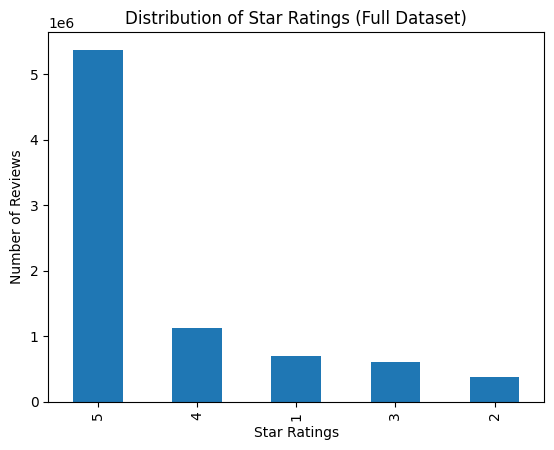

In [ ]:
#Checking distribution of data
star_rating_counts = df_full['overall'].value_counts()

star_rating_counts.plot(kind='bar')
plt.title('Distribution of Star Ratings (Full Dataset)')
plt.xlabel('Star Ratings')
plt.ylabel('Number of Reviews')
plt.show()

The data distribution reveals a notable skew towards 5-star ratings. A study conducted by Alma Economics for the UK Department of Business and Trade sheds light on one potential reason for this skew. Their findings suggest that approximately 11% to 15% of product reviews on leading UK e-commerce platforms might be fabricated. However, they also note that this proportion significantly varies across different product categories (Alma Economics, 2023). The study further delves into the same Amazon dataset being utilized in this project. Their analysis revealed that in specific categories like Home & Kitchen, Electronics, and Sport & Outdoors, the percentages of questionable reviews are 11.1%, 12.9%, and 11.5% respectively (Alma Economics, 2023). Based on these insights, it's reasonable to estimate that around 12% of the reviews in the dataset may not be genuine.

However, that alone is not enough to account for this disparity. Some sellers on the site pay for reviewers to leave good reviews on their product (Matsakis, 2019).
Additional factors contributing to the high volume of 5-star ratings include the presence of concealed negative sentiments within these reviews and the influence of other people's opinions on our own. These aspects will be explored in more detail in subsequent sections.

Balancing a dataset is crucial towards building an accurate model. An imbalanced dataset risks creating a model with a bias towards the majority class (Hvilshøj, 2022).This bias can have significant implications, especially in critical applications like medical diagnosis (Hvilshøj, 2022). Therefore, achieving balance through methods like under-sampling, over-sampling, and data augmentation is crucial. In this case, where a subset of Amazon's Toys review dataset is used, there will be a focus on over-sampling the less represented classes (1 to 4-star reviews) to address this imbalance.

In [ ]:
## Balancing the grid search dataset

# Reduce dataset size (Test 1: 2000, Test 2/3: 10000)
reduced_df = df_full[:2000]

num_five_star_reviews = reduced_df[reduced_df['overall'] == 5].shape[0]
grid_df = pd.DataFrame()

# Balance the dataset by adding 1 to 4 star reviews to match the number of 5 star reviews in the reduced dataset.
for rating in range(1, 5):
    rating_df = df_full[df_full['overall'] == rating]
    sampled_df = rating_df.sample(n=num_five_star_reviews)
    grid_df = grid_df.append(sampled_df)

# Adding the 5 star reviews
five_star_df = reduced_df[reduced_df['overall'] == 5]
grid_df = grid_df.append(five_star_df)

<ipython-input-6-eef959d1ca1c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid_df = grid_df.append(sampled_df)
<ipython-input-6-eef959d1ca1c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid_df = grid_df.append(sampled_df)
<ipython-input-6-eef959d1ca1c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid_df = grid_df.append(sampled_df)
<ipython-input-6-eef959d1ca1c>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  grid_df = grid_df.append(sampled_df)
<ipython-input-6-eef959d1ca1c>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gr

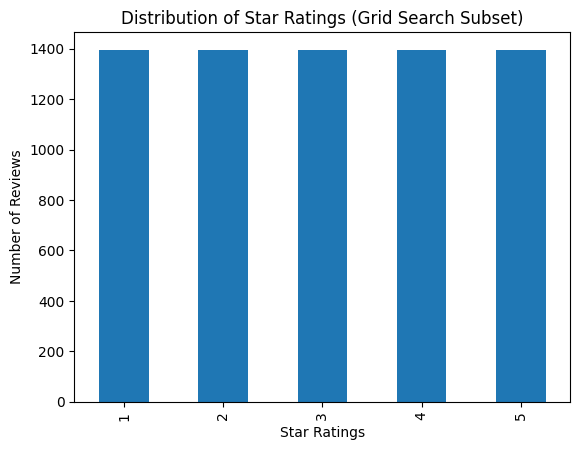

In [ ]:
# Checking distribution of grid search dataset
star_rating_counts = grid_df['overall'].value_counts()

star_rating_counts.plot(kind='bar')
plt.title('Distribution of Star Ratings (Grid Search Subset)')
plt.xlabel('Star Ratings')
plt.ylabel('Number of Reviews')
plt.show()


In [ ]:
## Balancing the final model dataset

# Reduce dataset size
reduced_df = df_full[:250000]

num_five_star_reviews = reduced_df[reduced_df['overall'] == 5].shape[0]
final_df = pd.DataFrame()

# Balance the dataset by adding 1 to 4 star reviews to match the number of 5 star reviews in the reduced dataset.
for rating in range(1, 5):
    rating_df = df_full[df_full['overall'] == rating]
    sampled_df = rating_df.sample(n=num_five_star_reviews)
    final_df = final_df.append(sampled_df)

# Adding the 5 star reviews
five_star_df = reduced_df[reduced_df['overall'] == 5]
final_df = final_df.append(five_star_df)

<ipython-input-4-06d754ef4b8d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(sampled_df)
<ipython-input-4-06d754ef4b8d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(sampled_df)
<ipython-input-4-06d754ef4b8d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(sampled_df)
<ipython-input-4-06d754ef4b8d>:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  final_df = final_df.append(sampled_df)
<ipython-input-4-06d754ef4b8d>:17: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat inste

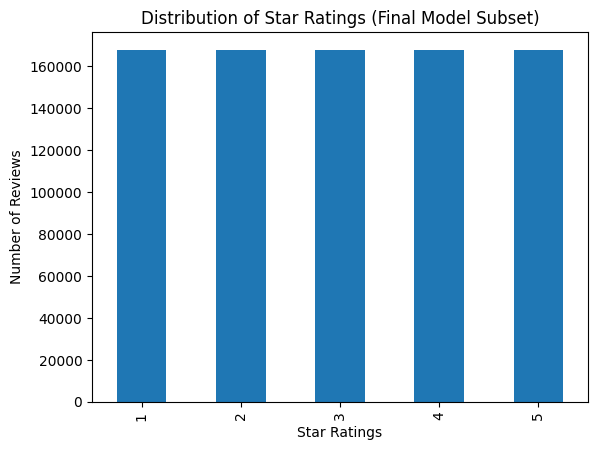

In [ ]:
# Checking distribution of final model dataset
star_rating_counts = final_df['overall'].value_counts()

star_rating_counts.plot(kind='bar')
plt.title('Distribution of Star Ratings (Final Model Subset)')
plt.xlabel('Star Ratings')
plt.ylabel('Number of Reviews')
plt.show()

## 4.4 Cleaning the Dataset


---


Ensuring the cleanliness of the dataset by removing extraneous information is crucial for achieving excellent outcomes, particularly in sentiment analysis and NLP. The removal of elements such as numbers, stopwords (common words like "and", "the", "in"), punctuation, and other non-essential text is greatly beneficial in constructing an accurate model, as these types of text generally lack sentiment value and are highly frequent, potentially eclipsing words that are more significant for analysis. The methods outlined below have been implemented with assistance from (Rastogi, 2022).

In [ ]:
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

# Function used to process/clean text by removing the afformentioned non-essential text
def preprocess_text(text):
    # Lowercase
    text = text.lower()
    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Replace multiple spaces with a single space
    text = re.sub(r'\s+', ' ', text).strip()
    # Tokenize
    words = text.split()
    # Remove stopwords and rejoin into a string
    return ' '.join([word for word in words if word.lower() not in stop_words])

    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
# Apply the processing function to the grid search dataset
grid_df['reviewText'] = grid_df['reviewText'].astype(str)
grid_df['reviewText'] = grid_df['reviewText'].apply(preprocess_text)

## Extracting the relevent data from the grid search dataset

# Reviews is the text body (X)
grid_reviews = grid_df['reviewText'].values
# Star rating is the rating score tied to the product (y)
grid_star_ratings = grid_df['overall'].values

In [ ]:
# Apply the processing function to the final model dataset
final_df['reviewText'] = final_df['reviewText'].astype(str)
final_df['reviewText'] = final_df['reviewText'].apply(preprocess_text)

## Extracting the relevent data from the final model dataset

# Reviews is the text body (X)
final_reviews = final_df['reviewText'].values
# Star rating is the rating score tied to the product (y)
final_star_ratings = final_df['overall'].values

In [ ]:
# Showcasing some examples from both datasets
print("First 5 Reviews and Star Ratings of the grid search dataset:")
for i in range(5):
    print(f"Star Rating: {grid_star_ratings[i]} - Review: {grid_reviews[i]}")

print("First 5 Reviews and Star Ratings of the final model dataset:")
for i in range(5):
    print(f"Star Rating: {final_star_ratings[i]} - Review: {final_reviews[i]}")

First 5 Reviews and Star Ratings of the grid search dataset:
Star Rating: 1 - Review: sure makes lots bubbles fragile ones liquid like water doesnt make good quality bubbles
Star Rating: 1 - Review: tail broken got return info anywhere box resides potted plant lake place
Star Rating: 1 - Review: overall quality poor pockets started falling apart hours indoors comic con
Star Rating: 1 - Review: middle rod came base baby playing loose stick best safest way repair cute otherwise
Star Rating: 1 - Review: refractometer works great however vender fails tell online ad need calibrate first special calibration fluid come refractometer apparently sells cost special calibration fluid almost much refractometer able reach vender two weeks purchase second bottle calibration fluid first one correct one vender good refractometer works could bought one much less expensive places would came necessary calibration fluid customer service would surely issue
First 5 Reviews and Star Ratings of the final mode

# 5. Data Preprocessing

## 5.1 Tokenization


---



Tokenization is the process of breaking down a sequnece of text into smaller units refered to as tokens (Pai, 2023). Examples of tokens include words, subwords, or characters (Pai, 2023). In Natural Language Processing (NLP), tokenization plays a cruicial role in transforming text data into a format that could be understood by machine learning models (Pai, 2023). By tokenizing the text, it allow for the conversion of textual data into numerical form, which enables the model to analyze and learn patterns from the text

In [ ]:
## Text Tokenization (grid dataset)

max_words = 10000

# Initialize Tokenizer and set set oov_tokens to '<OOV>' to handle words not a part of the vocabulary
tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(grid_reviews)

# Convert text to intergers
grid_sequences = tokenizer.texts_to_sequences(grid_reviews)


In [ ]:
## Text Tokenization (final model dataset)

max_words = 10000

# Initialize Tokenizer and set set oov_tokens to '<OOV>' to handle words not a part of the vocabulary
tokenizer2 = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer2.fit_on_texts(final_reviews)

# Convert text to intergers
final_sequences = tokenizer2.texts_to_sequences(final_reviews)


## 5.2 Padding


---


Padding is another crucial preprocessing step needed when developing an NLP model, especially in this case when dealing with reviews of vastly different lengths. Padding refers to the process of uniformly extending the length of text sequences in a dataset (Eisenstein, 2019). This is achieved by adding 'padding tokens' to shorter sequences to match the length of the longest sequence or a predefined maximum length (Hugging Face, n.d.). Padding ensures that all text data can be processed in batches, making it a vital preprocessing technique in NLP.

In [ ]:
## Text Padding (grid dataset)

max_length = 100

# Padding sequence to enure uniform length
grid_padded_sequences = pad_sequences(grid_sequences, maxlen = max_length, truncating = 'post', padding = 'post')

In [ ]:
## Text Padding (final model dataset)

max_length = 100

# Padding sequence to enure uniform length
final_padded_sequences = pad_sequences(final_sequences, maxlen = max_length, truncating = 'post', padding = 'post')

## 5.3 Splitting Dataset

In this model, the aim is to predict five distinct classes, corresponding to the five available rating options. To facilitate this, the dataset will be divided into training and test subsets, with a further division of the training set into separate training and validation subsets for more effective model evaluation. One-hot encoding is crucial in this context, as it converts categorical data into a numerical format, enabling the model to treat each rating category as separate and distinct entities. Before applying one-hot encoding, it's necessary to adjust the index of our ratings so that they fall within a 0-4 range, aligning with the one-hot encoding requirements.

In [ ]:
## Dataset Splitting (grid dataset)

X_train_grid, X_test_grid, y_train_grid, y_test_grid = train_test_split(grid_padded_sequences, grid_star_ratings, test_size = 0.2, random_state = 25)

# Adjust index
y_train_grid = y_train_grid - 1
y_test_grid = y_test_grid - 1

# One-Hot encoding the labels
y_train_grid = to_categorical(y_train_grid, num_classes=5)
y_test_grid = to_categorical(y_test_grid, num_classes=5)

print(f"Training Data: {X_train_grid.shape}, Training Labels: {y_train_grid.shape}")
print(f"Testing Data: {X_test_grid.shape}, Testing Labels: {y_test_grid.shape}")

Training Data: (32128, 100), Training Labels: (32128, 5)
Testing Data: (8032, 100), Testing Labels: (8032, 5)


In [ ]:
## Dataset Splitting (final model dataset)

X_train_final, X_test_final, y_train_final, y_test_final = train_test_split(final_padded_sequences, final_star_ratings, test_size = 0.1, random_state = 25)

# Adjust index
y_train_final = y_train_final - 1
y_test_final = y_test_final - 1

# One-Hot encoding the labels
y_train_final = to_categorical(y_train_final, num_classes=5)
y_test_final = to_categorical(y_test_final, num_classes=5)

print(f"Training Data: {X_train_final.shape}, Training Labels: {y_train_final.shape}")
print(f"Testing Data: {X_test_final.shape}, Testing Labels: {y_test_final.shape}")

Training Data: (755559, 100), Training Labels: (755559, 5)
Testing Data: (83951, 100), Testing Labels: (83951, 5)


# 6. Findings from Version 1 of The Project

---


In the initial draft of the project ([Version 1](https://colab.research.google.com/drive/1YLQHIvAUrbtO5HvY2q8MzAzoUvtks6Tk?usp=sharing)), several models were explored and tested. However, due to these extensive tests, a decision was made to establish a new project for testing near-final models, using Version 1 as a reference for decision-making.


It's important to note that most of the testing focused on the pure RNN model. Insights from this testing will inform some decisions for the Hybrid model, primarily due to time and computational limitations experienced during the fine-tuning phase of the RNN model.

In Version 1, I experimented with three different models, a pure RNN, a Hybrid (CNN-RNN), and an ANN, on a dataset comprising 250,000 reviews evenly distributed across five classes. All models were designed with similar structures to enable a fair comparison. The pure RNN model, detailed in Section 6 of Version 1, showed the best performance with a test accuracy of 55.20% and the highest validation accuracy at the final epoch. The Hybrid model, discussed in Section 7, achieved the highest overall accuracy (82.53%) but was outperformed by the pure RNN model in both test and validation accuracies. Notably, the Hybrid model suffered from significant overfitting, indicating that additional layers and fine-tuning could leverage its high accuracy for better outcomes. The ANN model, covered in Section 8, was the least effective, showing consistently low training and validation accuracies around 20% without improvement. This stagnation suggests that the ANN model's simplistic structure is inadequate for capturing the complexity of the data. Consequently, the ANN model will not be used in the current version of the project, focusing instead on the other two models.



# 7. Grid Search

---


The selection of appropriate hyperparameters is pivotal in determining a model's performance. To ascertain the most effective hyperparameters, a method known as grid search will be employed. This technique involves constructing a grid of various hyperparameter options and systematically testing each combination to identify the one that enhances the model's performance most effectively *(Brownlee, 2019)*. The primary objective of this grid search is not merely to achieve the highest accuracy but to develop a balanced model. High accuracy can sometimes be misleading if the model is overfitted to its training data, leading to poorer performance on new, unseen data. In practical applications, a model that is slightly less accurate but more balanced is often more beneficial, as it tends to generalize better to new scenarios (IBM, n.d.).

The grid search's computational complexity necessitates dividing it into three separate tests for each model. Despite utilizing Colab Pro and the V100 GPU, the full grid search's training time remains excessively lengthy. The structure of these tests will be such that the initial test uses the smallest dataset possible to examine some key hyperparameters. Subsequently, the remaining two tests will focus on further refinements of the model, concurrently reducing the list of parameters while increasing the dataset size.



## 7.1 Metrics

---

The nuances of accurately predicting star ratings in sentiment analysis and NLP arises from the subjective nature of individual reviews. What one person may consider a "good" product worthy of a 5-star rating, another might rate as a 3-star product. Additionally, there are complexities such as 'hidden negatives' in reviews, where a reviewer might point out significant flaws in a product but still award a high rating (Text2Data, n.d.). These factors can introduce inaccuracies in predictive models, underscoring the importance of monitoring the right metrics during model assessment.

Traditional metrics like F1-score, precision, and accuracy will be employed to evaluate the models. However, to gain a more elaboraye understanding, an additional metric inspired by Oren Shapira's project (Shapira, 2022) will be included: the "accuracy_within_one_star." This metric, which assesses how often the model's predictions are within one star of the actual rating, can provide deeper insights and enhance the analysis of the models' performance.

In [ ]:
# Creating the accuracy within 1-star function
def accuracy_within_one_star(y_true, y_pred):
    y_true_class = K.argmax(y_true, axis=-1)
    y_pred_class = K.argmax(y_pred, axis=-1)
    correct_predictions = K.cast(K.less_equal(K.abs(y_true_class - y_pred_class), 1), 'float32')
    return K.mean(correct_predictions)

In [ ]:
plt.style.use('bmh')

# Function to showcase results in a graph
def plot_graphs(history, metric, fig_size=(6, 3)):
    plt.figure(figsize=fig_size)
    plt.plot(history.history[metric])
    plt.plot(history.history['val_'+metric], '')
    plt.xlabel("Epochs")
    plt.ylabel(metric)
    plt.legend([metric, 'val_'+metric])
    plt.show()

## 7.2 Grid Search on The Pure RNN Model

In [ ]:
# Original RNN blueprint
#def rnn_blueprint(embedding_dim=50, lstm_units=128, dropout_rate=0.5, bidirectional= True, dense1 = 258, dense2 = 128):
#    model = Sequential()
#    model.add(Embedding(max_words, embedding_dim, input_length=max_length))
#    if bidirectional:
#        model.add(Bidirectional(LSTM(lstm_units)))
#    else:
#        model.add(LSTM(lstm_units))
#    model.add(Dropout(dropout_rate))
#    model.add(Dense(dense1, activation='relu'))
#    model.add(Dropout(dropout_rate))
#    model.add(Dense(dense2, activation='relu'))
#    model.add(Dropout(dropout_rate))
#    model.add(Dense(5, activation='softmax'))
#    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', accuracy_within_one_star])
#    return model

#model_RNN_grid = KerasClassifier(build_fn=rnn_blueprint, epochs=8, validation_split = 0.15, batch_size=100, verbose=1,
#                        embedding_dim=None, lstm_units=None, dropout_rate=None,
#                        bidirectional=None, dense1=None, dense2=None)

# Setting up the grid search parameters
#param_grid = {
#    'embedding_dim': [30, 50, 80],
#    'lstm_units': [28, 64, 128, 264],
#    'dropout_rate': [0.3, 0.5, 0.7],
#    'bidirectional': [True, False],
#    'dense1':[50,125,250],
#    'dense2':[30,50,70]
#}

#grid = GridSearchCV(estimator=model_RNN_grid , param_grid=param_grid, n_jobs=-1, cv=3, verbose=10)
#grid_result_RNN = grid.fit(X_train_grid, y_train_grid)

### 7.2.1 RNN Grid Search Test 1

---

Due to an issue with saving the initial test model of the pure RNN, the model itself is no longer accessable. However, the test results remain available. This model was evaluated using a dataset comprising 6975 reviews. The hyperparameters involved in this test included the dropout rate, embedding dimensions, the number of LSTM units, and the size of the first dense layer. From the observed results, it appears that higher dropout rates (0.7) led to suboptimal performance, likely due to the over-regularization and resulting underfitting. Conversely, a combination of lower LSTM units, reduced dropout rates, and an increased size of the dense layer seemed to yield better outcomes. As for the embedding dimensions, they did not exhibit a clear influence on the results, suggesting that their impact on model performance may be less significant or dependent on other factors.

---

**Results of test 1: (sorted from worst to best)**

```
0.353584 with: {'dense1': 50, 'dropout_rate': 0.7, 'embedding_dim': 80, 'lstm_units': 28}
0.371685 with: {'dense1': 50, 'dropout_rate': 0.7, 'embedding_dim': 50, 'lstm_units': 128}
0.375806 with: {'dense1': 50, 'dropout_rate': 0.7, 'embedding_dim': 80, 'lstm_units': 128}
0.377778 with: {'dense1': 50, 'dropout_rate': 0.7, 'embedding_dim': 50, 'lstm_units': 28}
0.379032 with: {'dense1': 50, 'dropout_rate': 0.7, 'embedding_dim': 50, 'lstm_units': 64}
0.399283 with: {'dense1': 50, 'dropout_rate': 0.7, 'embedding_dim': 80, 'lstm_units': 64}
0.404122 with: {'dense1': 125, 'dropout_rate': 0.7, 'embedding_dim': 50, 'lstm_units': 28}
0.404122 with: {'dense1': 125, 'dropout_rate': 0.7, 'embedding_dim': 80, 'lstm_units': 28}
0.420968 with: {'dense1': 125, 'dropout_rate': 0.7, 'embedding_dim': 80, 'lstm_units': 64}
0.423477 with: {'dense1': 125, 'dropout_rate': 0.7, 'embedding_dim': 50, 'lstm_units': 64}
0.426344 with: {'dense1': 250, 'dropout_rate': 0.7, 'embedding_dim': 50, 'lstm_units': 28}
0.426344 with: {'dense1': 250, 'dropout_rate': 0.7, 'embedding_dim': 80, 'lstm_units': 28}
0.430287 with: {'dense1': 250, 'dropout_rate': 0.7, 'embedding_dim': 50, 'lstm_units': 128}
0.431183 with: {'dense1': 125, 'dropout_rate': 0.7, 'embedding_dim': 50, 'lstm_units': 128}
0.436918 with: {'dense1': 50, 'dropout_rate': 0.5, 'embedding_dim': 50, 'lstm_units': 128}
0.437455 with: {'dense1': 250, 'dropout_rate': 0.7, 'embedding_dim': 80, 'lstm_units': 64}
0.439427 with: {'dense1': 125, 'dropout_rate': 0.7, 'embedding_dim': 80, 'lstm_units': 128}
0.457168 with: {'dense1': 250, 'dropout_rate': 0.5, 'embedding_dim': 50, 'lstm_units': 28}
0.459140 with: {'dense1': 125, 'dropout_rate': 0.5, 'embedding_dim': 50, 'lstm_units': 64}
0.459498 with: {'dense1': 125, 'dropout_rate': 0.5, 'embedding_dim': 80, 'lstm_units': 64}
0.461111 with: {'dense1': 50, 'dropout_rate': 0.3, 'embedding_dim': 80, 'lstm_units': 64}
0.461111 with: {'dense1': 125, 'dropout_rate': 0.3, 'embedding_dim': 50, 'lstm_units': 128}
0.461470 with: {'dense1': 125, 'dropout_rate': 0.3, 'embedding_dim': 50, 'lstm_units': 64}
0.461470 with: {'dense1': 250, 'dropout_rate': 0.3, 'embedding_dim': 50, 'lstm_units': 128}
0.462007 with: {'dense1': 250, 'dropout_rate': 0.7, 'embedding_dim': 80, 'lstm_units': 128}
0.465054 with: {'dense1': 250, 'dropout_rate': 0.3, 'embedding_dim': 50, 'lstm_units': 64}
0.465233 with: {'dense1': 250, 'dropout_rate': 0.3, 'embedding_dim': 80, 'lstm_units': 128}
0.465412 with: {'dense1': 250, 'dropout_rate': 0.5, 'embedding_dim': 50, 'lstm_units': 128}
0.465771 with: {'dense1': 250, 'dropout_rate': 0.3, 'embedding_dim': 80, 'lstm_units': 64}
0.467384 with: {'dense1': 250, 'dropout_rate': 0.3, 'embedding_dim': 50, 'lstm_units': 28}
0.467921 with: {'dense1': 250, 'dropout_rate': 0.5, 'embedding_dim': 80, 'lstm_units': 128}
0.467921 with: {'dense1': 250, 'dropout_rate': 0.7, 'embedding_dim': 50, 'lstm_units': 64}
0.468100 with: {'dense1': 50, 'dropout_rate': 0.3, 'embedding_dim': 50, 'lstm_units': 28}
0.468817 with: {'dense1': 125, 'dropout_rate': 0.3, 'embedding_dim': 80, 'lstm_units': 128}
0.468996 with: {'dense1': 50, 'dropout_rate': 0.3, 'embedding_dim': 50, 'lstm_units': 64}
0.471147 with: {'dense1': 50, 'dropout_rate': 0.5, 'embedding_dim': 80, 'lstm_units': 128}
0.472043 with: {'dense1': 50, 'dropout_rate': 0.3, 'embedding_dim': 80, 'lstm_units': 128}
0.472939 with: {'dense1': 250, 'dropout_rate': 0.5, 'embedding_dim': 80, 'lstm_units': 28}
0.474910 with: {'dense1': 125, 'dropout_rate': 0.3, 'embedding_dim': 80, 'lstm_units': 28}
0.475448 with: {'dense1': 50, 'dropout_rate': 0.3, 'embedding_dim': 50, 'lstm_units': 128}
0.476344 with: {'dense1': 125, 'dropout_rate': 0.5, 'embedding_dim': 80, 'lstm_units': 128}
0.476703 with: {'dense1': 50, 'dropout_rate': 0.5, 'embedding_dim': 80, 'lstm_units': 64}
0.477957 with: {'dense1': 125, 'dropout_rate': 0.3, 'embedding_dim': 80, 'lstm_units': 64}
0.478315 with: {'dense1': 125, 'dropout_rate': 0.5, 'embedding_dim': 50, 'lstm_units': 128}
0.478853 with: {'dense1': 125, 'dropout_rate': 0.5, 'embedding_dim': 50, 'lstm_units': 28}
0.478853 with: {'dense1': 250, 'dropout_rate': 0.5, 'embedding_dim': 80, 'lstm_units': 64}
0.479570 with: {'dense1': 50, 'dropout_rate': 0.5, 'embedding_dim': 50, 'lstm_units': 28}
0.480287 with: {'dense1': 250, 'dropout_rate': 0.5, 'embedding_dim': 50, 'lstm_units': 64}
0.482437 with: {'dense1': 50, 'dropout_rate': 0.5, 'embedding_dim': 50, 'lstm_units': 64}
0.483154 with: {'dense1': 50, 'dropout_rate': 0.5, 'embedding_dim': 80, 'lstm_units': 28}
0.483333 with: {'dense1': 50, 'dropout_rate': 0.3, 'embedding_dim': 80, 'lstm_units': 28}
0.483333 with: {'dense1': 250, 'dropout_rate': 0.3, 'embedding_dim': 80, 'lstm_units': 28}
0.486738 with: {'dense1': 125, 'dropout_rate': 0.3, 'embedding_dim': 50, 'lstm_units': 28}
0.491398 with: {'dense1': 125, 'dropout_rate': 0.5, 'embedding_dim': 80, 'lstm_units': 28}
```

### 7.2.2 RNN Grid Search Test 2

---

In the results obtained from the initial test, the dropout rate was determined to be optimally set at 0.5, and the neuron count in the first dense layer was fixed at 125. These parameters, having shown promise in the first test, will not be included in the subsequent grid search. The size of the dataset used in this test is 40160 reviews.

The focus of this grid search will be on evaluating the comparative effectiveness of bidirectional LSTM layers versus standard LSTM layers.
Unlike traditional LSTMs that process data in a single direction, Bidirectional LSTMs analyze the text from both forward and backward directions, capturing nuanced dependencies between words. This dual-direction processing allows for more effective feature extraction and a better grasp of complex sentence structures, leading to more accurate sentiment predictions. However, this improvement in contextual understanding comes at the cost of increased computational complexity.

Additionally, attention will be directed towards examining the configuration of the second dense layer, which remained unaltered in the first test.

In [ ]:
# Building Test 2 RNN blueprint
def rnn_blueprint(lstm_units=128, bidirectional= True, dropout_rate=0.5, dense2 = 50):
    model = Sequential()
    model.add(Embedding(max_words, 80, input_length=max_length))
    if bidirectional:
        model.add(Bidirectional(LSTM(lstm_units)))
    else:
        model.add(LSTM(lstm_units))
    model.add(Dropout(dropout_rate))
    model.add(Dense(125, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', accuracy_within_one_star])
    return model

In [ ]:
# Test 2 Model
model_RNN_grid = KerasClassifier(build_fn=rnn_blueprint, epochs=8, validation_split = 0.15, batch_size=128, verbose=1,
                                lstm_units=None, bidirectional=None, dense2=None)

# Setting up the grid search parameters for test 2
param_grid = {
    'lstm_units': [28, 64],
    'bidirectional': [True, False],
    'dense2':[30,50,70]
}

grid = GridSearchCV(estimator=model_RNN_grid , param_grid=param_grid, n_jobs=-1, cv=3, verbose=10)
grid_result_RNN = grid.fit(X_train_grid, y_train_grid)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/8
214/214 [==============================] - 39s 147ms/step - loss: 1.3611 - accuracy: 0.3680 - accuracy_within_one_star: 0.7042 - val_loss: 1.1080 - val_accuracy: 0.5145 - val_accuracy_within_one_star: 0.8572
Epoch 2/8
214/214 [==============================] - 17s 77ms/step - loss: 1.0711 - accuracy: 0.5251 - accuracy_within_one_star: 0.8794 - val_loss: 1.0326 - val_accuracy: 0.5353 - val_accuracy_within_one_star: 0.8728
Epoch 3/8
214/214 [==============================] - 12s 55ms/step - loss: 0.9705 - accuracy: 0.5785 - accuracy_within_one_star: 0.9156 - val_loss: 1.0355 - val_accuracy: 0.5512 - val_accuracy_within_one_star: 0.8862
Epoch 4/8
214/214 [==============================] - 10s 46ms/step - loss: 0.9019 - accuracy: 0.6159 - accuracy_within_one_star: 0.9331 - val_loss: 1.0690 - val_accuracy: 0.5398 - val_accuracy_within_one_star: 0.8840
Epoch 5/8
214/214 [==============================] - 8s 36ms/step - loss: 0.8481 - accuracy: 0.6404 - accuracy_within_one_star: 0.9

In [ ]:
# Save the grid search results

model_filename = 'grid_search_RNN_exp2.pkl'
filepath = '/content/drive/MyDrive/AI&ML2/Assignment'
fullpath = os.path.join(filepath, model_filename)

with open(fullpath, 'wb') as file:
    pickle.dump(grid_result_RNN, file)

In [ ]:
get_custom_objects().update({'accuracy_within_one_star': accuracy_within_one_star})
# Load the grid search to redisplay the results (they were accidentally removed)
model_filename = 'grid_search_RNN_exp2.pkl'
filepath = '/content/drive/MyDrive/AI&ML2/Assignment'
fullpath = os.path.join(filepath, model_filename)
with open(fullpath, 'rb') as file:
    grid_result_RNN = pickle.load(file)

In [ ]:
## Display results

results = zip(grid_result_RNN.cv_results_['mean_test_score'],
              grid_result_RNN.cv_results_['params'])

results = list(results)

# Sort the list by mean_score
sorted_results = sorted(results, key=lambda x: x[0])  # Sorts by the first element of each tuple (mean_score)

# Print results from worst to best
for mean_score, params in sorted_results:
    print("Mean Score: %f, Parameters: %r" % (mean_score, params))


Mean Score: 0.199857, Parameters: {'bidirectional': False, 'dense2': 30, 'lstm_units': 64}
Mean Score: 0.202471, Parameters: {'bidirectional': False, 'dense2': 70, 'lstm_units': 64}
Mean Score: 0.202814, Parameters: {'bidirectional': False, 'dense2': 50, 'lstm_units': 28}
Mean Score: 0.203685, Parameters: {'bidirectional': False, 'dense2': 50, 'lstm_units': 64}
Mean Score: 0.204277, Parameters: {'bidirectional': False, 'dense2': 30, 'lstm_units': 28}
Mean Score: 0.205989, Parameters: {'bidirectional': False, 'dense2': 70, 'lstm_units': 28}
Mean Score: 0.518831, Parameters: {'bidirectional': True, 'dense2': 30, 'lstm_units': 64}
Mean Score: 0.519049, Parameters: {'bidirectional': True, 'dense2': 50, 'lstm_units': 28}
Mean Score: 0.520045, Parameters: {'bidirectional': True, 'dense2': 70, 'lstm_units': 64}
Mean Score: 0.520668, Parameters: {'bidirectional': True, 'dense2': 30, 'lstm_units': 28}
Mean Score: 0.521601, Parameters: {'bidirectional': True, 'dense2': 50, 'lstm_units': 64}
Mean

In [ ]:
# Make predictions
best_model_RNN_grid = grid_result_RNN.best_estimator_
y_pred_grid = best_model_RNN_grid.predict(X_test_grid)

# Compute additional metrics
print(classification_report(y_test_grid, y_pred_grid))

accuracy_within_one_star = accuracy_within_one_star(y_test_grid, y_pred_grid)

print("Parameters:", params)
print("Accuracy within one star:", accuracy_within_one_star)



Upon examining the outcomes from the models produced in test 2, it's evident that the absence of bidirectional LSTMs leads to significant underperformance, marked by a 30% drop in accuracy. Although bidirectional LSTMs hold an inherent advantage, having been incorporated in test 1 where their unit count was optimized. Despite this, Bidirectional LSTMs will still be adopted for the final model due to the significant gap in performance.

Regarding other tested parameters, the second dense layer shows optimal performance with 70 units, and a reduced LSTM unit count offers only a slight improvement.

A comparison between the top-performing models from the first and second tests reveals that the latter model slightly edges out with 52.3% accuracy, compared to 49.1%. This improvement is likely attributable to the increased dataset size in the second test and a more refined hyperparameter configuration.


### 7.2.3 RNN Grid Search Test 3

---
In this test the focus will be on incorporating new layers and making adjustments to diversify our approach, aiming for enhanced model accuracy. This test uses the same size dataset as the test before.

This test introduces two key elements: the GRU layer and batch normalization. A Gated Recurrent Unit (GRU) is a variant of the recurrent neural network layer, sharing similarities with the LSTM. Its design focuses on addressing the vanishing gradient issue, a common challenge in neural network training (Kostadinov, 2017). GRUs are particularly effective in scenarios where grasping the sequence context and element order is vital. On the other hand, batch normalization is a technique for standardizing and scaling activation levels (Ag, 2019). This approach offers multiple advantages, such as expediting the training process, mitigating the risk of model overfitting, and contributing to a more stable learning environment (Saxena, 2023).

In [ ]:
# Building Test 3 RNN blueprint
def rnn_blueprint(lstm_units=128, gru= 50, dropout_rate=0.5, batch_norm = True, no_dropout = False):
    model = Sequential()
    model.add(Embedding(max_words, 80, input_length=max_length))
    if gru != 0:
      model.add(Bidirectional(LSTM(lstm_units, return_sequences=True)))
      model.add(GRU(gru))
    else:
      model.add(Bidirectional(LSTM(lstm_units)))
    if batch_norm:
      model.add(BatchNormalization())
    model.add(Dropout(dropout_rate))
    model.add(Dense(125, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(70, activation='relu'))
    if not no_dropout:
      model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', accuracy_within_one_star])
    return model

In [ ]:
# Test 3 Model
model_RNN_grid = KerasClassifier(build_fn=rnn_blueprint, epochs=8, validation_split=0.15, batch_size=128, verbose=1,
                                 lstm_units=None, gru=None, no_dropout=None, batch_norm = None)

# Setting up the grid search parameters
param_grid = {
    'lstm_units': [28, 64],
    'gru': [0, 50, 100],
    'batch_norm': [True, False],
    'no_dropout':[True, False]
}

grid = GridSearchCV(estimator=model_RNN_grid, param_grid=param_grid, n_jobs=-1, cv=3, verbose=10)
grid_result_RNN = grid.fit(X_train_grid, y_train_grid)

Fitting 3 folds for each of 24 candidates, totalling 72 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/8
214/214 [==============================] - 24s 92ms/step - loss: 1.4067 - accuracy: 0.3493 - accuracy_within_one_star: 0.6786 - val_loss: 1.1762 - val_accuracy: 0.4633 - val_accuracy_within_one_star: 0.7983
Epoch 2/8
214/214 [==============================] - 11s 52ms/step - loss: 1.1351 - accuracy: 0.4913 - accuracy_within_one_star: 0.8456 - val_loss: 1.0582 - val_accuracy: 0.5303 - val_accuracy_within_one_star: 0.8739
Epoch 3/8
214/214 [==============================] - 9s 44ms/step - loss: 0.9962 - accuracy: 0.5615 - accuracy_within_one_star: 0.9074 - val_loss: 1.0371 - val_accuracy: 0.5444 - val_accuracy_within_one_star: 0.8991
Epoch 4/8
214/214 [==============================] - 7s 32ms/step - loss: 0.9148 - accuracy: 0.6057 - accuracy_within_one_star: 0.9342 - val_loss: 1.0439 - val_accuracy: 0.5398 - val_accuracy_within_one_star: 0.8953
Epoch 5/8
214/214 [==============================] - 5s 22ms/step - loss: 0.8513 - accuracy: 0.6372 - accuracy_within_one_star: 0.9475

In [ ]:
# Save the grid search results

model_filename = 'grid_search_RNN_exp4.pkl'
filepath = '/content/drive/MyDrive/AI&ML2/Assignment'
fullpath = os.path.join(filepath, model_filename)

with open(fullpath, 'wb') as file:
    pickle.dump(grid_result_RNN, file)

In [ ]:
## Display results

results = zip(grid_result_RNN.cv_results_['mean_test_score'],
              grid_result_RNN.cv_results_['params'])

results = list(results)

# Sort the list by mean_score
sorted_results = sorted(results, key=lambda x: x[0])  # Sorts by the first element of each tuple (mean_score)

# Print results from worst to best
for mean_score, params in sorted_results:
    print("Mean Score: %f, Parameters: %r" % (mean_score, params))

Mean Score: 0.197896, Parameters: {'batch_norm': False, 'gru': 100, 'lstm_units': 64, 'no_dropout': True}
Mean Score: 0.200541, Parameters: {'batch_norm': False, 'gru': 50, 'lstm_units': 64, 'no_dropout': True}
Mean Score: 0.200791, Parameters: {'batch_norm': False, 'gru': 100, 'lstm_units': 64, 'no_dropout': False}
Mean Score: 0.201320, Parameters: {'batch_norm': False, 'gru': 50, 'lstm_units': 28, 'no_dropout': False}
Mean Score: 0.202098, Parameters: {'batch_norm': False, 'gru': 50, 'lstm_units': 64, 'no_dropout': False}
Mean Score: 0.202316, Parameters: {'batch_norm': False, 'gru': 100, 'lstm_units': 28, 'no_dropout': False}
Mean Score: 0.203498, Parameters: {'batch_norm': False, 'gru': 50, 'lstm_units': 28, 'no_dropout': True}
Mean Score: 0.260149, Parameters: {'batch_norm': True, 'gru': 100, 'lstm_units': 64, 'no_dropout': False}
Mean Score: 0.268273, Parameters: {'batch_norm': True, 'gru': 100, 'lstm_units': 28, 'no_dropout': False}
Mean Score: 0.276301, Parameters: {'batch_norm

In [ ]:
# Make predictions
best_model_RNN_grid = grid_result_RNN.best_estimator_
y_pred_grid = best_model_RNN_grid.predict(X_test_grid)

# Compute additional metrics
print(classification_report(y_test_grid, y_pred_grid))

accuracy_within_one_star = accuracy_within_one_star(y_test_grid, y_pred_grid)

print("Parameters:", params)
print("Accuracy within one star:", accuracy_within_one_star)

63/63 [==============================] - 1s 5ms/step
              precision    recall  f1-score   support

           0       0.56      0.58      0.57      1582
           1       0.35      0.31      0.33      1585
           2       0.37      0.39      0.38      1677
           3       0.51      0.46      0.48      1634
           4       0.79      0.87      0.82      1554

   micro avg       0.52      0.52      0.52      8032
   macro avg       0.51      0.52      0.52      8032
weighted avg       0.51      0.52      0.51      8032
 samples avg       0.52      0.52      0.52      8032

Parameters: {'batch_norm': False, 'gru': 0, 'lstm_units': 64, 'no_dropout': False}
Accuracy within one star: tf.Tensor(0.87898403, shape=(), dtype=float32)


Upon analyzing the outcomes from the third test, it was determined that models lacking batch normalization and GRU layers produced the best results. A possible explanation for this could be that the integration of GRU layers introduced additional complexity, potentially leading to overfitting. Furthermore, the integration of new layers such as GRUs and batch normalization typically mandates a more exhaustive recalibration of hyperparameters. Settings that were effective in prior models may not necessarily align with models incorporating these new elements. However, due to constraints in computational resources and the extensive nature of such testing, this is not feasible within the scope of the current project.

Interestingly, the highest mean score in Test 3 (0.521664) was only slightly lower than the top score from Test 2 (0.523811). The similarity in performance between these models is likely due to their shared hyperparameters, with the only notable difference being the number of LSTM units. Based on these insights, the architecture for the final model will be derived from the most successful configurations observed in Tests 2 and 3.

## 7.3 Grid Search on The Hybrid Model (RNN-CNN Model)

### 7.3.1 Hybrid Grid Search Test 1

---

In this initial trial of the Hybrid model, the primary focus is to evaluate the impact of the newly incorporated CNN layers. The architecture of this model, apart from the CNN segment, is derived from the most successful configurations identified in the RNN grid search. This approach ensures a solid foundational structure while we explore the effects of the added CNN components. Consequently, the hyperparameters under examination in this test are exclusively related to these new CNN layers.

In [ ]:
# Hybrid blueprint test 1
def hybrid_blueprint(lstm_units=64, dropout_rate=0.5, filters=64, kernel_size=3, pool = 3):
    model = Sequential()
    model.add(Embedding(max_words, 80, input_length=max_length))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool))
    # Return sequence = True as as GlobalMaxPooling expects a 3D input

    model.add(Bidirectional(LSTM(lstm_units, return_sequences= True)))
    model.add(Dropout(dropout_rate))
    model.add(GlobalMaxPooling1D())

    model.add(Dense(125, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(70, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', accuracy_within_one_star])
    return model

In [ ]:
# Test 1 Model
model_hybrid_grid = KerasClassifier(build_fn=hybrid_blueprint, epochs=8, validation_split=0.15, batch_size=32, verbose=1,
                                    pool=None, kernel_size=None, filters=None)

# Setting up the grid search parameters for the hybrid CNN-RNN model
param_grid = {
    'pool': [2, 3, 4],
    'filters': [25, 50, 100],
    'kernel_size': [3, 5, 7]
    #'max_pool': [True, False]
}
# Changed n_jobs to 4
grid = GridSearchCV(estimator=model_hybrid_grid, param_grid=param_grid, n_jobs=4, cv=3, verbose=10)
grid_result_hybrid = grid.fit(X_train_grid, y_train_grid)

Fitting 3 folds for each of 27 candidates, totalling 81 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
2 fits failed out of a total of 81.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py",

Epoch 1/8
149/149 [==============================] - 29s 145ms/step - loss: 1.6019 - accuracy: 0.2193 - accuracy_within_one_star: 0.5456 - val_loss: 1.5093 - val_accuracy: 0.3274 - val_accuracy_within_one_star: 0.7465
Epoch 2/8
149/149 [==============================] - 12s 78ms/step - loss: 1.3118 - accuracy: 0.4044 - accuracy_within_one_star: 0.8047 - val_loss: 1.1854 - val_accuracy: 0.4827 - val_accuracy_within_one_star: 0.8815
Epoch 3/8
149/149 [==============================] - 7s 50ms/step - loss: 1.0014 - accuracy: 0.5258 - accuracy_within_one_star: 0.9270 - val_loss: 1.1172 - val_accuracy: 0.5066 - val_accuracy_within_one_star: 0.8919
Epoch 4/8
149/149 [==============================] - 7s 47ms/step - loss: 0.8207 - accuracy: 0.6135 - accuracy_within_one_star: 0.9729 - val_loss: 1.1289 - val_accuracy: 0.4886 - val_accuracy_within_one_star: 0.9109
Epoch 5/8
149/149 [==============================] - 6s 39ms/step - loss: 0.6997 - accuracy: 0.6968 - accuracy_within_one_star: 0.984

In [ ]:
# Save the grid search results

model_filename = 'grid_search_hybrid_exp1.pkl'
filepath = '/content/drive/MyDrive/AI&ML2/Assignment'
fullpath = os.path.join(filepath, model_filename)

with open(fullpath, 'wb') as file:
    pickle.dump(grid_result_hybrid, file)

In [ ]:
## Display results

results = zip(grid_result_hybrid.cv_results_['mean_test_score'],
              grid_result_hybrid.cv_results_['params'])

results = list(results)

# Sort the list by mean_score
sorted_results = sorted(results, key=lambda x: x[0])  # Sorts by the first element of each tuple (mean_score)

# Print results from worst to best
for mean_score, params in sorted_results:
    print("Mean Score: %f, Parameters: %r" % (mean_score, params))

Mean Score: 0.459140, Parameters: {'filters': 25, 'kernel_size': 5, 'pool': 2}
Mean Score: 0.459498, Parameters: {'filters': 50, 'kernel_size': 5, 'pool': 2}
Mean Score: 0.463441, Parameters: {'filters': 25, 'kernel_size': 3, 'pool': 3}
Mean Score: 0.463441, Parameters: {'filters': 25, 'kernel_size': 5, 'pool': 4}
Mean Score: 0.465950, Parameters: {'filters': 100, 'kernel_size': 3, 'pool': 4}
Mean Score: 0.466487, Parameters: {'filters': 25, 'kernel_size': 7, 'pool': 2}
Mean Score: 0.467742, Parameters: {'filters': 25, 'kernel_size': 3, 'pool': 4}
Mean Score: 0.467742, Parameters: {'filters': 50, 'kernel_size': 5, 'pool': 4}
Mean Score: 0.468280, Parameters: {'filters': 50, 'kernel_size': 7, 'pool': 3}
Mean Score: 0.468459, Parameters: {'filters': 100, 'kernel_size': 7, 'pool': 4}
Mean Score: 0.470072, Parameters: {'filters': 50, 'kernel_size': 7, 'pool': 4}
Mean Score: 0.470072, Parameters: {'filters': 100, 'kernel_size': 5, 'pool': 2}
Mean Score: 0.470430, Parameters: {'filters': 25,

In [ ]:
# Make predictions
best_model_hybrid_grid = grid_result_hybrid.best_estimator_
y_pred_grid = best_model_hybrid_grid.predict(X_test_grid)

# Compute additional metrics
print(classification_report(y_test_grid, y_pred_grid))

accuracy_within_one_star = accuracy_within_one_star(y_test_grid, y_pred_grid)

print("Parameters:", params)
print("Accuracy within one star:", accuracy_within_one_star)

44/44 [==============================] - 1s 4ms/step
              precision    recall  f1-score   support

           0       0.66      0.34      0.45       291
           1       0.38      0.48      0.42       279
           2       0.39      0.44      0.41       281
           3       0.44      0.58      0.50       283
           4       0.81      0.62      0.70       261

   micro avg       0.49      0.49      0.49      1395
   macro avg       0.54      0.49      0.50      1395
weighted avg       0.53      0.49      0.49      1395
 samples avg       0.49      0.49      0.49      1395

Parameters: {'filters': 100, 'kernel_size': 5, 'pool': 4}
Accuracy within one star: tf.Tensor(0.90107524, shape=(), dtype=float32)


The original test scope was reduced due to significant resource consumption that led to environment crashes. Adjustments were made to batch size and n_jobs in an effort to reduce resource use. However, it's important to note that this constraint impacted the testing, particularly for models with higher filter numbers, which in some cases failed to produce results. This limitation in testing capabilities, especially concerning GPU constraints, restricted the ability to conduct more extensive and rigorous evaluations.

Upon examining the available results, it becomes evident that there is no distinct trend in terms of the combined impact of filters, kernel size, and pooling on model performance. The outcomes show similar levels of accuracy across a variety of parameter configurations, with most results falling within a 2% accuracy range of each other. One consistent observation is that an increase in the number of filters tends to correlate with slightly improved results. This trend suggests that the models benefit from a higher capacity to capture features.

However, the relatively narrow range of mean scores, all hovering around 0.46 to 0.48, indicates a potential performance ceiling with the current model architecture or the data being used. To achieve significant improvements or breakthroughs in model performance, other hyperparameters must be tested.



### 7.3.2 Hybrid Grid Search Test 2

---

In the previous tests, the addition of a new CNN layer and adjustments in its hyperparameters did not lead to markedly different outcomes. Therefore, this current test will shift its focus back to the other layers that were initially examined in the RNN grid search, specifically targeting the dropout rate and dense layers. This approach is aimed at identifying the most effective combination of parameters for the Hybrid model. It's important to note that while the default parameters were originally chosen based on their superior performance in the RNN model, this doesn't necessarily imply that they are the best fit for the Hybrid model. Therefore, a reassessment is essential to optimize the model's configuration.

In [ ]:
# Hybrid blueprint test 2
def hybrid_blueprint(lstm_units=64, dropout_rate=0.5, filters=100, kernel_size=5, pool = 4, dense1= 125, dense2 = 70):
    model = Sequential()
    model.add(Embedding(max_words, 80, input_length=max_length))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool))
    model.add(Bidirectional(LSTM(lstm_units, return_sequences= True)))
    model.add(Dropout(dropout_rate))
    model.add(GlobalMaxPooling1D())
    model.add(Dense(dense1, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense2, activation='relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', accuracy_within_one_star])
    return model

In [ ]:
# Test 2 Model
model_hybrid_grid = KerasClassifier(build_fn=hybrid_blueprint, epochs=8, validation_split=0.15, batch_size=32, verbose=1,
                                    dropout_rate = None, dense1 = None, dense2 = None)

# Setting up the grid search parameters for the hybrid CNN-RNN model
param_grid = {
    'dropout_rate': [0.3,0.4,0.5],
    'dense1':[100, 125, 150, 200],
    'dense2':[40, 70, 100]

}
# Changed n_jobs to 4
grid = GridSearchCV(estimator=model_hybrid_grid, param_grid=param_grid, n_jobs=4, cv=3, verbose=10)
grid_result_hybrid = grid.fit(X_train_grid, y_train_grid)

Fitting 3 folds for each of 36 candidates, totalling 108 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 108.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py"

Epoch 1/8
854/854 [==============================] - 53s 55ms/step - loss: 1.1878 - accuracy: 0.4579 - accuracy_within_one_star: 0.8111 - val_loss: 1.0382 - val_accuracy: 0.5388 - val_accuracy_within_one_star: 0.9108
Epoch 2/8
854/854 [==============================] - 13s 16ms/step - loss: 0.9450 - accuracy: 0.5912 - accuracy_within_one_star: 0.9237 - val_loss: 1.0303 - val_accuracy: 0.5479 - val_accuracy_within_one_star: 0.8872
Epoch 3/8
854/854 [==============================] - 11s 13ms/step - loss: 0.8006 - accuracy: 0.6627 - accuracy_within_one_star: 0.9561 - val_loss: 1.0895 - val_accuracy: 0.5378 - val_accuracy_within_one_star: 0.8886
Epoch 4/8
854/854 [==============================] - 9s 10ms/step - loss: 0.6476 - accuracy: 0.7386 - accuracy_within_one_star: 0.9748 - val_loss: 1.2278 - val_accuracy: 0.5315 - val_accuracy_within_one_star: 0.8885
Epoch 5/8
854/854 [==============================] - 9s 11ms/step - loss: 0.5166 - accuracy: 0.8030 - accuracy_within_one_star: 0.982

In [ ]:
# Save the grid search results

model_filename = 'grid_search_hybrid_exp2.pkl'
filepath = '/content/drive/MyDrive/AI&ML2/Assignment'
fullpath = os.path.join(filepath, model_filename)

with open(fullpath, 'wb') as file:
    pickle.dump(grid_result_hybrid, file)

In [ ]:
## Display results

results = zip(grid_result_hybrid.cv_results_['mean_test_score'],
              grid_result_hybrid.cv_results_['params'])

results = list(results)

# Sort the list by mean_score
sorted_results = sorted(results, key=lambda x: x[0])  # Sorts by the first element of each tuple (mean_score)

# Print results from worst to best
for mean_score, params in sorted_results:
    print("Mean Score: %f, Parameters: %r" % (mean_score, params))

Mean Score: 0.487954, Parameters: {'dense1': 100, 'dense2': 40, 'dropout_rate': 0.5}
Mean Score: 0.490476, Parameters: {'dense1': 125, 'dense2': 40, 'dropout_rate': 0.4}
Mean Score: 0.493682, Parameters: {'dense1': 150, 'dense2': 40, 'dropout_rate': 0.5}
Mean Score: 0.495020, Parameters: {'dense1': 100, 'dense2': 70, 'dropout_rate': 0.3}
Mean Score: 0.497230, Parameters: {'dense1': 100, 'dense2': 100, 'dropout_rate': 0.3}
Mean Score: 0.498008, Parameters: {'dense1': 150, 'dense2': 70, 'dropout_rate': 0.4}
Mean Score: 0.498475, Parameters: {'dense1': 200, 'dense2': 40, 'dropout_rate': 0.3}
Mean Score: 0.498537, Parameters: {'dense1': 200, 'dense2': 70, 'dropout_rate': 0.3}
Mean Score: 0.498568, Parameters: {'dense1': 150, 'dense2': 100, 'dropout_rate': 0.5}
Mean Score: 0.499409, Parameters: {'dense1': 125, 'dense2': 70, 'dropout_rate': 0.4}
Mean Score: 0.500280, Parameters: {'dense1': 125, 'dense2': 70, 'dropout_rate': 0.5}
Mean Score: 0.500311, Parameters: {'dense1': 125, 'dense2': 100

In [ ]:
# Make predictions
best_model_hybrid_grid = grid_result_hybrid.best_estimator_
y_pred_grid = best_model_hybrid_grid.predict(X_test_grid)

# Compute additional metrics
print(classification_report(y_test_grid, y_pred_grid))

accuracy_within_one_star = accuracy_within_one_star(y_test_grid, y_pred_grid)

print("Parameters:", params)
print("Accuracy within one star:", accuracy_within_one_star)

251/251 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.57      0.46      0.51      1582
           1       0.36      0.50      0.42      1585
           2       0.38      0.42      0.40      1677
           3       0.55      0.39      0.46      1634
           4       0.84      0.84      0.84      1554

   micro avg       0.52      0.52      0.52      8032
   macro avg       0.54      0.52      0.53      8032
weighted avg       0.54      0.52      0.52      8032
 samples avg       0.52      0.52      0.52      8032

Parameters: {'dense1': 200, 'dense2': 100, 'dropout_rate': 0.3}
Accuracy within one star: tf.Tensor(0.88994026, shape=(), dtype=float32)


Examining the outcomes of the test, we observe that the scores lie within a tight range of about 0.487 to 0.510. This indicates a relatively modest variation in performance across different parameter settings, implying that the model may not be highly sensitive to these parameter adjustments. Nevertheless, certain patterns do emerge from the data. It appears that a greater number of units in the second dense layer tends to yield improved performance. Additionally, there seems to be an interaction effect between the dropout rates and the number of units in the dense layers. Configurations with both a higher number of units and a higher dropout rate, as well as those with a lower number of units and a lower dropout rate, are associated with better results.

### 7.3.3 Hybrid Grid Search Test 3

Based on insights from the previous test, we have decided to opt for configurations with fewer dense layer units and a lower dropout rate. This approach is favored due to its lower computational demands compared to the alternative, which involves a higher unit count and increased dropout rate. The objective of the upcoming test is to explore new hyperparameters that have not been previously tested. This includes experimenting with the learning rate among other adjustments, to determine whether these changes can lead to improved performance.

We're also integrating L1 and L2 regularization techniques to address the prevalent issue of overfitting observed in most of our models. These regularization methods are known for their effectiveness in reducing overfitting. By incorporating both L1 (Lasso) and L2 (Ridge) regularization into our grid search, we have the opportunity to thoroughly investigate and identify the ideal equilibrium between the model's complexity and its ability to generalize.

In [ ]:
# Hybrid blueprint test 2
def hybrid_blueprint(lstm_units=64, dropout_rate=0.3, filters=100, kernel_size=5, pool = 4, dense1= 125, dense2 = 100,
                     l1_rate=0.01, l2_rate=0.01, learning_rate=0.001):
    model = Sequential()
    model.add(Embedding(max_words, 80, input_length=max_length))
    model.add(Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'))
    model.add(MaxPooling1D(pool_size=pool))
    model.add(Bidirectional(LSTM(lstm_units, return_sequences= True)))
    model.add(Dropout(dropout_rate))
    model.add(GlobalMaxPooling1D())

    # Applying L1 and L2 regularization to dense layers
    model.add(Dense(dense1, activation='relu', kernel_regularizer=l1_l2(l1=l1_rate, l2=l2_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(dense2, activation='relu', kernel_regularizer=l1_l2(l1=l1_rate, l2=l2_rate)))
    model.add(Dropout(dropout_rate))
    model.add(Dense(5, activation='softmax'))

    optimizer = Adam(learning_rate=learning_rate)

    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy', accuracy_within_one_star])
    return model

In [ ]:
# Test 3 Model
model_hybrid_grid = KerasClassifier(build_fn=hybrid_blueprint, epochs=8, validation_split=0.15, batch_size=32, verbose=1,
                                    learning_rate=None, l1_rate=None, l2_rate=None)

# Setting up the grid search parameters for the hybrid CNN-RNN model
param_grid = {
    'learning_rate': [0.001, 0.005],
    'l1_rate': [0.001, 0.005, 0.01],
    'l2_rate': [0.001, 0.005, 0.01]

}
# Changed n_jobs to 4
grid = GridSearchCV(estimator=model_hybrid_grid, param_grid=param_grid, n_jobs=4, cv=3, verbose=10)
grid_result_hybrid = grid.fit(X_train_grid, y_train_grid)

Fitting 3 folds for each of 18 candidates, totalling 54 fits


/usr/local/lib/python3.10/dist-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/scikeras/wrappers.py:915: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


Epoch 1/8
854/854 [==============================] - 56s 56ms/step - loss: 1.5388 - accuracy: 0.3805 - accuracy_within_one_star: 0.7297 - val_loss: 1.2018 - val_accuracy: 0.4892 - val_accuracy_within_one_star: 0.8177
Epoch 2/8
854/854 [==============================] - 15s 18ms/step - loss: 1.1459 - accuracy: 0.5131 - accuracy_within_one_star: 0.8643 - val_loss: 1.1286 - val_accuracy: 0.5263 - val_accuracy_within_one_star: 0.8846
Epoch 3/8
854/854 [==============================] - 12s 14ms/step - loss: 1.0240 - accuracy: 0.5780 - accuracy_within_one_star: 0.9244 - val_loss: 1.1178 - val_accuracy: 0.5297 - val_accuracy_within_one_star: 0.8831
Epoch 4/8
854/854 [==============================] - 11s 12ms/step - loss: 0.9236 - accuracy: 0.6351 - accuracy_within_one_star: 0.9552 - val_loss: 1.1713 - val_accuracy: 0.5145 - val_accuracy_within_one_star: 0.8754
Epoch 5/8
854/854 [==============================] - 9s 11ms/step - loss: 0.8375 - accuracy: 0.6797 - accuracy_within_one_star: 0.97

In [ ]:
# Save the grid search results

model_filename = 'grid_search_hybrid_exp3.pkl'
filepath = '/content/drive/MyDrive/AI&ML2/Assignment'
fullpath = os.path.join(filepath, model_filename)

with open(fullpath, 'wb') as file:
    pickle.dump(grid_result_hybrid, file)

In [ ]:
## Display results

results = zip(grid_result_hybrid.cv_results_['mean_test_score'],
              grid_result_hybrid.cv_results_['params'])

results = list(results)

# Sort the list by mean_score
sorted_results = sorted(results, key=lambda x: x[0])  # Sorts by the first element of each tuple (mean_score)

# Print results from worst to best
for mean_score, params in sorted_results:
    print("Mean Score: %f, Parameters: %r" % (mean_score, params))

Mean Score: 0.195842, Parameters: {'l1_rate': 0.005, 'l2_rate': 0.001, 'learning_rate': 0.005}
Mean Score: 0.195842, Parameters: {'l1_rate': 0.005, 'l2_rate': 0.005, 'learning_rate': 0.005}
Mean Score: 0.195873, Parameters: {'l1_rate': 0.01, 'l2_rate': 0.001, 'learning_rate': 0.001}
Mean Score: 0.195873, Parameters: {'l1_rate': 0.01, 'l2_rate': 0.005, 'learning_rate': 0.005}
Mean Score: 0.198550, Parameters: {'l1_rate': 0.005, 'l2_rate': 0.001, 'learning_rate': 0.001}
Mean Score: 0.198550, Parameters: {'l1_rate': 0.005, 'l2_rate': 0.005, 'learning_rate': 0.001}
Mean Score: 0.198550, Parameters: {'l1_rate': 0.005, 'l2_rate': 0.01, 'learning_rate': 0.001}
Mean Score: 0.198550, Parameters: {'l1_rate': 0.01, 'l2_rate': 0.005, 'learning_rate': 0.001}
Mean Score: 0.198550, Parameters: {'l1_rate': 0.01, 'l2_rate': 0.01, 'learning_rate': 0.001}
Mean Score: 0.198985, Parameters: {'l1_rate': 0.01, 'l2_rate': 0.01, 'learning_rate': 0.005}
Mean Score: 0.199265, Parameters: {'l1_rate': 0.01, 'l2_ra

In [ ]:
# Make predictions
best_model_hybrid_grid = grid_result_hybrid.best_estimator_
y_pred_grid = best_model_hybrid_grid.predict(X_test_grid)

# Compute additional metrics
print(classification_report(y_test_grid, y_pred_grid))

accuracy_within_one_star = accuracy_within_one_star(y_test_grid, y_pred_grid)

print("Parameters:", params)
print("Accuracy within one star:", accuracy_within_one_star)
mean_score = grid_result_hybrid.best_score_
print("Mean Score:", mean_score)

251/251 [==============================] - 1s 3ms/step
              precision    recall  f1-score   support

           0       0.56      0.53      0.55      1582
           1       0.36      0.33      0.35      1585
           2       0.35      0.47      0.40      1677
           3       0.51      0.35      0.42      1634
           4       0.80      0.87      0.83      1554

   micro avg       0.51      0.51      0.51      8032
   macro avg       0.52      0.51      0.51      8032
weighted avg       0.51      0.51      0.51      8032
 samples avg       0.51      0.51      0.51      8032

Parameters: {'l1_rate': 0.001, 'l2_rate': 0.001, 'learning_rate': 0.001}
Accuracy within one star: tf.Tensor(0.8872012, shape=(), dtype=float32)
Mean Score: 0.40462815686239634


Introducing L1 and L2 regularization into the model appears to have had an overall negative impact. When comparing the mean scores from this test, which ranged from 0.195 to 0.405, with those from the previous test (0.487 to 0.510), it's evident that the recent modifications have adversely affected the model's accuracy. In isolation, the best results were achieved with lower L1 and L2 rates, especially at 0.001, as indicated by the highest mean scores. This outcome implies that a less intensive approach to regularization might be more suitable for this particular model and dataset.

Nevertheless, given the significant drop in performance relative to the previous test, the adjustments implemented in this test will not be included in the final version of the Hybrid model. The stark contrast in results suggests that the specific changes made here do not align well with the model's requirements or the nature of the dataset.

# 8. Final Models

## 8.1 Final RNN Model

---

The architecture of the final RNN model will be derived from the best configuration identified in the second grid search test. This decision is dictated by its superior performance, achieving a 52.3% result, which surpasses the 52.1% and 49.1% outcomes of the third and first tests, respectively. For training this model, we will utilize a considerably larger dataset, encompassing approximately 839,510 reviews.

### 8.1.1 Building The Final RNN Model

In [ ]:
embedding_dimension = 80
lstm_units = 64
dropout_rate = 0.5

# Building the RNN Model
model_RNN = Sequential([
    Embedding(max_words, embedding_dimension, input_length=max_length),
    Bidirectional(LSTM(lstm_units)),
    Dropout(dropout_rate),
    Dense(125, activation='relu'),
    Dropout(dropout_rate),
    Dense(70, activation='relu'),
    Dropout(dropout_rate),
    Dense(5, activation='softmax')
])

model_RNN.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', accuracy_within_one_star])


### 8.1.2 Training The Final RNN Model

In [ ]:
epoch = 10

# Train and store the model in history
history_RNN = model_RNN.fit(X_train_final, y_train_final,
                    epochs=epoch,
                    validation_split=0.15,
                    batch_size=128,
                    verbose=1)

Epoch 1/10
5018/5018 [==============================] - 139s 26ms/step - loss: 1.1310 - accuracy: 0.5072 - accuracy_within_one_star: 0.8782 - val_loss: 1.0464 - val_accuracy: 0.5427 - val_accuracy_within_one_star: 0.9016
Epoch 2/10
5018/5018 [==============================] - 70s 14ms/step - loss: 1.0584 - accuracy: 0.5442 - accuracy_within_one_star: 0.9033 - val_loss: 1.0358 - val_accuracy: 0.5488 - val_accuracy_within_one_star: 0.8985
Epoch 3/10
5018/5018 [==============================] - 67s 13ms/step - loss: 1.0310 - accuracy: 0.5566 - accuracy_within_one_star: 0.9105 - val_loss: 1.0257 - val_accuracy: 0.5553 - val_accuracy_within_one_star: 0.9077
Epoch 4/10
5018/5018 [==============================] - 66s 13ms/step - loss: 1.0082 - accuracy: 0.5675 - accuracy_within_one_star: 0.9163 - val_loss: 1.0252 - val_accuracy: 0.5555 - val_accuracy_within_one_star: 0.9092
Epoch 5/10
5018/5018 [==============================] - 62s 12ms/step - loss: 0.9870 - accuracy: 0.5763 - accuracy_with

### 8.1.3 Evaluating The Final RNN Model

In [ ]:
# Saving the model
model_filename = 'Full_RNN_exp1.pkl'
filepath = '/content/drive/MyDrive/AI&ML2/Assignment'
fullpath = os.path.join(filepath, model_filename)

with open(fullpath, 'wb') as file:
    pickle.dump(history_RNN, file)

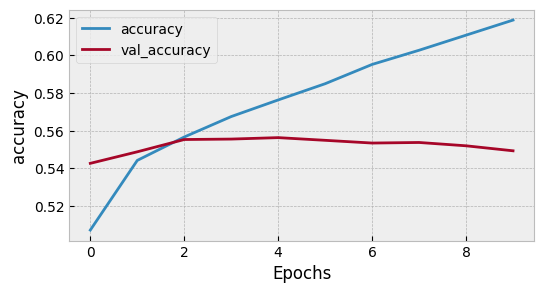

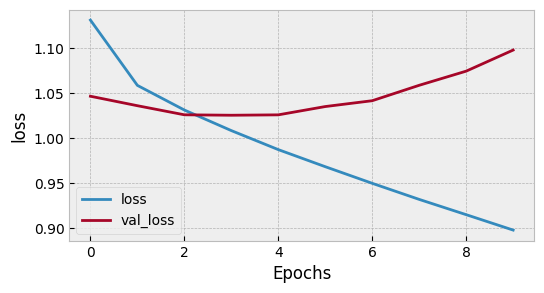

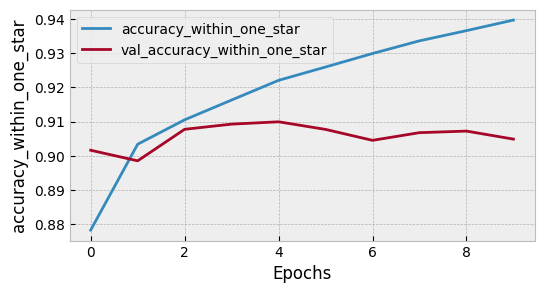



2624/2624 [==============================] - 11s 4ms/step
              precision    recall  f1-score   support

           0       0.60      0.69      0.64     16886
           1       0.43      0.38      0.41     16798
           2       0.44      0.41      0.42     16759
           3       0.52      0.51      0.52     16735
           4       0.71      0.76      0.73     16773

    accuracy                           0.55     83951
   macro avg       0.54      0.55      0.54     83951
weighted avg       0.54      0.55      0.54     83951



In [ ]:
plot_graphs(history_RNN, 'accuracy')
print('\n')
plot_graphs(history_RNN, 'loss')
print('\n')
plot_graphs(history_RNN, 'accuracy_within_one_star')
print('\n')

# Make prediction and print classification report
y_pred_final = model_RNN.predict(X_test_final)

# Convert to class labels
y_pred_labels = np.argmax(y_pred_final, axis=1)
y_test_labels = np.argmax(y_test_final, axis=1)

print(classification_report(y_test_labels, y_pred_labels))

When analyzing the results, several important observations can be made. The model achieved an accuracy of 55%, with precision, recall, and F1-score that are somewhat varied across different classes.Notably, Classes 0 and 4, representing 1-star and 5-star reviews respectively, performed significantly better than others. This indicates the model's proficiency in identifying extreme cases, either very positive or very negative. There's a slight positive bias, evidenced by the superior performance of 5-star reviews, the best among all classes, and 4-star reviews notably outperforming 2-star reviews by about 10% in precision, recall, and F1-score.

A critical metric, 'accuracy_within_one_star', remained above 90% after the initial epochs. This highlights that while the model might not always pinpoint the exact star rating, it often comes close, indicating a good grasp of the overall sentiment.

The enlarged dataset likely enhanced the model's robustness, outperforming the best model from grid search by approximately 3%. However, the dataset's size also presents challenges in computational resources and training time. Any experimentation aimed at improving this model would necessitate resources beyond the current project's scope.

Further dicussion on the model's performance will be presented in section 9 of the project.




## 8.2 Final Hybrid Model

---

The final Hybrid model will adopt the architecture from the most successful configuration found in the second grid search test, selected due to its surperior performance with a 51% result. This configuration outperformed the 40.4% and 48.3% achieved in the third and first tests, respectively. In line with our previous approach, we will train this model using a dataset comprising 839,510 reviews.








### 8.2.1 Building The Final Hybrid Model

In [ ]:
embedding_dimension = 80
lstm_units = 64
dropout_rate = 0.3
filters = 100
kernel_size = 5
pool = 4

# Building the Hybrid Model
model_Hybrid = Sequential([
    Embedding(max_words, embedding_dimension, input_length=max_length),
    Conv1D(filters=filters, kernel_size=kernel_size, activation='relu'),
    MaxPooling1D(pool_size=pool),
    Bidirectional(LSTM(lstm_units, return_sequences=True)),
    Dropout(dropout_rate),
    GlobalMaxPooling1D(),
    Dense(125, activation='relu'),
    Dropout(dropout_rate),
    Dense(100, activation='relu'),
    Dropout(dropout_rate),
    Dense(5, activation='softmax')
])

model_Hybrid.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy', accuracy_within_one_star])

### 8.2.2 Training The Final Hybrid Model

In [ ]:
epoch = 10

# Train and store the model in history
history_Hybrid = model_Hybrid.fit(X_train_final, y_train_final,
                    epochs=epoch,
                    validation_split=0.15,
                    batch_size=128,
                    verbose=1)

Epoch 1/10
5018/5018 [==============================] - 190s 35ms/step - loss: 1.0925 - accuracy: 0.5213 - accuracy_within_one_star: 0.8901 - val_loss: 1.0321 - val_accuracy: 0.5499 - val_accuracy_within_one_star: 0.9073
Epoch 2/10
5018/5018 [==============================] - 45s 9ms/step - loss: 1.0049 - accuracy: 0.5652 - accuracy_within_one_star: 0.9165 - val_loss: 1.0186 - val_accuracy: 0.5570 - val_accuracy_within_one_star: 0.9156
Epoch 3/10
5018/5018 [==============================] - 42s 8ms/step - loss: 0.9562 - accuracy: 0.5881 - accuracy_within_one_star: 0.9283 - val_loss: 1.0330 - val_accuracy: 0.5505 - val_accuracy_within_one_star: 0.9096
Epoch 4/10
5018/5018 [==============================] - 43s 8ms/step - loss: 0.9081 - accuracy: 0.6110 - accuracy_within_one_star: 0.9386 - val_loss: 1.0301 - val_accuracy: 0.5522 - val_accuracy_within_one_star: 0.9057
Epoch 5/10
5018/5018 [==============================] - 41s 8ms/step - loss: 0.8597 - accuracy: 0.6348 - accuracy_within_o

### 8.2.3 Evaluating The Final Hybrid Model

In [ ]:
# Saving the model
model_filename = 'Full_Hybrid_exp1.pkl'
filepath = '/content/drive/MyDrive/AI&ML2/Assignment'
fullpath = os.path.join(filepath, model_filename)

with open(fullpath, 'wb') as file:
    pickle.dump(history_Hybrid, file)

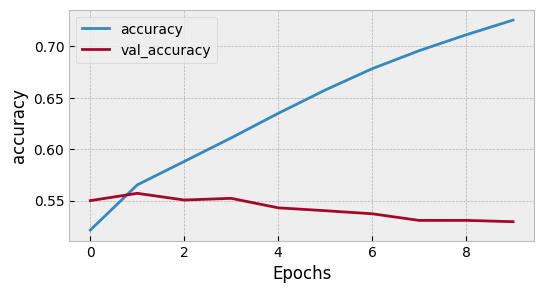

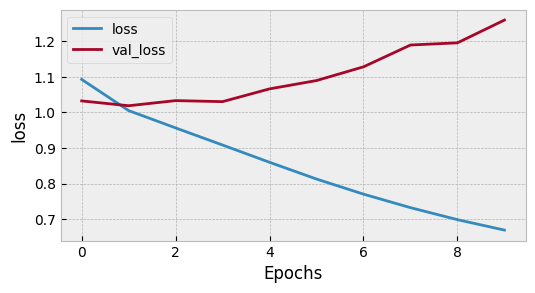

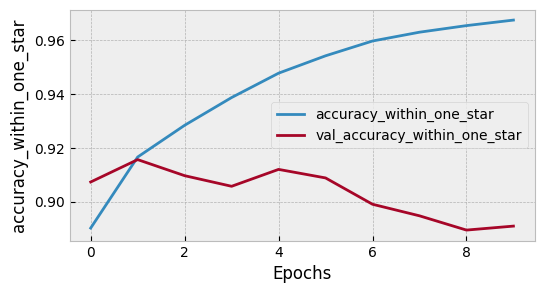



2624/2624 [==============================] - 8s 3ms/step
              precision    recall  f1-score   support

           0       0.60      0.62      0.61     16886
           1       0.42      0.37      0.40     16798
           2       0.42      0.39      0.40     16759
           3       0.49      0.47      0.48     16735
           4       0.66      0.78      0.72     16773

    accuracy                           0.53     83951
   macro avg       0.52      0.53      0.52     83951
weighted avg       0.52      0.53      0.52     83951



In [ ]:
plot_graphs(history_Hybrid, 'accuracy')
print('\n')
plot_graphs(history_Hybrid, 'loss')
print('\n')
plot_graphs(history_Hybrid, 'accuracy_within_one_star')
print('\n')

# Make prediction and print classification report
y_pred_final = model_Hybrid.predict(X_test_final)

# Convert to class labels
y_pred_labels = np.argmax(y_pred_final, axis=1)
y_test_labels = np.argmax(y_test_final, axis=1)

print(classification_report(y_test_labels, y_pred_labels))



The Hybrid model achieved a performance level of around 53%, which, while slightly lower than the accuracy of the RNN model, still demonstrates considerable predictive ability, especially considering the dataset's complexity and size. This performance exceeds that of the best grid search Hybrid model by 2%.

Like the RNN model, a consistent pattern in this model is its high 'accuracy_within_one_star', exceeding 90% for most epochs. This shows the model's competency in closely approximating sentiment, even if it does not always accurately predict the exact star rating.

Furthermore, this model exhibits a tendency to perform better with extreme cases, as it shows the highest accuracy in predicting 1-star and 5-star reviews. It also displays a bias towards positive reviews, though this bias is less pronounced compared to the RNN model.

As previously mentioned, a more comprehensive discussion of these models will take place in section 9 of the project.

# 9. Analysis and Discussion

## 9.1 Comparing The Two Models

---


Examining the performance of both models reveals that the RNN model slightly outperforms the Hybrid model, achieving 55% accuracy versus the Hybrid's 53%. This slight difference could be significant depending on how critical accuracy is for the application. As noted previously, both models exhibit a high 'accuracy_within_one_star' of 90%, suggesting their competence in approximating sentiment, even if the exact star rating isn't always correctly predicted.

There is noticeable variability in performance across different classes in both models. However, the RNN model demonstrates a more balanced performance across these classes. In contrast, the Hybrid model is particularly effective in recognizing highly positive reviews but struggles comparatively in other classes. Signs of overfitting are evident in both models, as shown by increasing validation loss and stagnating or declining validation accuracy over time. This indicates that the models might be tailored to the training data, compromising their ability to generalize. Notably, the disparity between training accuracy and validation accuracy begins to widen early in the training process, around the second epoch for both models. This issue is particularly evident in the Hybrid model. Although it shows a higher training accuracy than the RNN model by approximately 10%, it ultimately yields inferior results. This discrepancy is attributed to a greater degree of overfitting in the Hybrid model.

Both models exhibit a bias towards positive reviews, with 5-star ratings performing best in both cases. However, in comparison to the grid search models, they perform marginally worse, with the best grid search models achieving precision, recall, and F1 scores of around 80%, compared to about 70% for the final models. Nevertheless, the final models are more balanced than their grid search counterparts. Both are computationally demanding, and refining them would require resources beyond the scope of this project.

Considering the above factors, the RNN model seems to be the better choice. It offers a slightly higher overall accuracy, more consistent performance across classes, and a robust understanding of context, all of which are essential in sentiment analysis.


## 9.2 Analysis and Comparison with Similar Research Projects

---

The discussion around our models can be enriched by comparing them with similar research projects. An interesting benchmark for this purpose is Oren Shapira's project, as detailed in their Medium article. Shapira's work focused on predicting star ratings for Amazon digital music album reviews, employing algorithms like SVM, DNN, and CNN, alongside text vectorization methods such as Bag of Words and GloVe. Despite being constrained to a smaller subset of 10,000 records from approximately 1.5 million due to processing limitations, their best model (a DNN with BOW) attained a 62% accuracy rate.

In contrast, our project explored neural networks with a particular emphasis on RNN and Hybrid models, diverging from the broader range of models in Shapira's study. Their project utilized a smaller part of the Amazon digital music album reviews, which itself is part of the larger Amazon reviews dataset. Our project, on the other hand, focused on the 'toys and games' section of the same Amazon reviews dataset. Interestingly, while Shapira's models achieved a higher overall accuracy, this might be attributed to their dataset's skew towards 5-star ratings, a bias introduced during their sampling process. Our models were trained on a more evenly distributed dataset, potentially offering a more balanced view across all classes.

Despite the apparent superiority of Shapira's model in terms of overall accuracy, both our models and theirs demonstrated a similar proficiency in approximating sentiment, with accuracies of around 90% within one star of the true rating. This similarity suggests a comparable capability in closely estimating user sentiment. Both projects also grappled with overfitting, a common challenge in Amazon review sentiment analysis.

The comparison with Shapira's work indicates that our models are solid and effective in the field of sentiment analysis. They demonstrate a commendable level of reliability, particularly when it comes to discerning between positive and negative reviews. This analysis, drawing on insights from Shapira's article, deepens our understanding of where our models stand in sentiment analysis research. For a comprehensive review of Shapira's methods and results, you can read their article on ["Using Neural Networks and NLP Word Embedding to Predict Amazon User Review Sentiment"](https://medium.com/mlearning-ai/using-neural-networks-and-nlp-word-embedding-to-predict-amazon-user-review-sentiment-28156f69e1e1).

## 9.3 Discussion on Methods for Improvement



Both models show promise in sentiment analysis, yet there is potential for further enhancement. Implementing the following strategies could lead to more effective and precise models:

* **Early Stopping:** Observations indicate that both models reach their optimal performance relatively early during training (2nd epoch for the hybrid model and 5th epoch for the RNN model). Early stopping halts training once improvement ceases on the validation dataset, preventing the model from learning noise present in the data (Amazon Web Services, n.d.). Therefore, applying early stopping can help avoid overfitting to the training dataset.

* **Architecture Exploration:** Investigating different layers or architectures, such as advanced neural network types like transformers, could enhance model performance. The effectiveness of RNNs diminishes with longer sequences of relevant information, as seen in extensive customer reviews (Giacaglia, 2019). While LSTMs aim to improve information retention, they encounter similar challenges with overly lengthy sentences (Giacaglia, 2019). Transformers, with their parallel processing of sequences, excel at capturing long-term dependencies in text (Giacaglia, 2019).

* **Model Ensembling:** This approach merges predictions from multiple models (Amazon Web Services, n.d.). Given that both models exhibited a tendency towards extreme and positive reviews, combining models with a focus on underperforming classes could yield better outcomes.

* **Transfer Learning:** Applying a pre-trained model to a new task can significantly enhance its ability to generalize, thus improving accuracy and real-world applicability (Donges, 2022). Furthermore, addressing more specific issues is feasible with a model developed on top of a pre-trained base.

These strategies, if implemented, could significantly refine the performance of the sentiment analysis models.





# 10. Conclusion

---


In summary, this project offered numerous insights. Initially, we hypothesized that the Hybrid model would outperform others due to its complexity; however, this very aspect slightly impeded its performance compared to the RNN model. Although the overall accuracy of both models was modest, their ability to achieve high within-1-star accuracy in sentiment analysis was impressive. This suggests potential for accurately distinguishing between positive and negative reviews, which could be instrumental in monitoring customer feedback on products.

A significant challenge encountered was the propensity of these models to overfit. Attempts to address this issue through methods like L1 and L2 regularization were unsuccessful, indicating a need for further investigation into the text and model structure. We also observed a predominance of 5-star reviews on Amazon and similar platforms. Notably, these reviews outnumbered all other categories combined, presenting a unique challenge. Additionally, the phenomenon of "hidden negatives" in 5-star reviews, where users report problems but still assign high ratings, would have had an effect on model accuracy (Text2Data, n.d.). The project also shed light on the issue of fake or bot-generated reviews, estimated to constitute about 11% to 15% of reviews on major UK e-commerce sites (Alma Economics, 2023).

Although we wished to explore more models and benchmark ours against industry standards, such as transformer-based techniques, constraints of time and resources limited our scope. The project was particularly hampered by insufficient resources for extensive model testing. Overall, the project was enlightening and educational. We hope to revisit and refine these models in the future, building on the valuable lessons learned.


# References

---

* Ag, A. (2019, August 31). Batch Normalization in Deep Learning. Medium. https://medium.com/ai%C2%B3-theory-practice-business/batch-normalization-in-deep-learning-ca215a7a7a5d
* Alma Economics. (2023). Fake online reviews research. UK Government. https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/1152812/fake-online-reviews-research.pdf
* Amazon Web Services. (n.d.). Overfitting. https://aws.amazon.com/what-is/overfitting/
* Amazon Web Services. (n.d.). What is Sentiment Analysis? https://aws.amazon.com/what-is/sentiment-analysis/
* Brownlee, J. (2022, August 4). Grid Search Hyperparameters for Deep Learning Models in Python With Keras. Machine Learning Mastery. https://machinelearningmastery.com/grid-search-hyper
* Donges, N. (2022, September 12). Transfer Learning. https://builtin.com/data-science/transfer-learning
* Eisenstein, J. (2019). Introduction to Natural Language Processing.
* Giacaglia, G. (2019, March 11) How Transformers Work. https://towardsdatascience.com/transformers-141e32e69591
* Hugging Face. (n.d.). Padding & Truncation. https://huggingface.co/docs/transformers/pad_truncation
* Hvilshøj, F. (2022, November 11). An Introduction to Balanced and Imbalanced Datasets in Machine Learning. https://encord.com/blog/an-introduction-to-balanced-and-imbalanced-datasets-in-machine-learning/
* IBM. (n.d.). Overfitting. https://www.ibm.com/topics/overfitting
* Kostadinov, S. (2017, December 17). Understanding GRU networks. https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be
* Matsakis, L. (2019, May 25). How Amazon's star ratings are calculated. Wired. https://www.wired.com/story/amazon-stars-ratings-calculated/
* Ni, J. (2019). Empirical Methods in Natural Language Processing. https://cseweb.ucsd.edu/~jmcauley/datasets/amazon_v2/
* Pai, A. (2023, September 18). What is Tokenization in NLP? Vidhya. https://www.analyticsvidhya.com/blog/2020/05/what-is-tokenization-nlp/
* Rastogi, K. (2022, November 22). Text Cleaning Methods in NLP. Analytics Vidhya. https://www.analyticsvidhya.com/blog/2022/01/text-cleaning-methods-in-nlp/
* Robinson, S. (2021, April 12). Sentiment analysis: Why it's necessary and how it improves CX. TechTarget. https://www.techtarget.com/searchcustomerexperience/tip/Sentiment-analysis-Why-its-necessary-and-how-it-improves-CX
* Saxena, S. (2023, November 22). Introduction to Batch Normalization. https://www.analyticsvidhya.com/blog/2021/03/introduction-to-batch-normalization/
* Shapira, O (2022, October 24). Using Neural Networks and NLP Word Embedding to Predict Amazon User Review Sentiment. Medium. https://medium.com/mlearning-ai/using-neural-networks-and-nlp-word-embedding-to-predict-amazon-user-review-sentiment-28156f69e1e1
* Text2Data. (n.d.). Hidden Negatives in Amazon 5-Star Reviews. https://text2data.com/blog/hidden-negatives-in-amazon-5-star-reviews